# FBProphet - PM10

## Import Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/data_imputed.csv')
df.head()

,timestamp_local,temp,city_name,country_code,aqi,co,no2,o3,pm10,pm25,so2
0,2022-02-01 00:00:00,12.6,Gujrāt,PK,385.0,1339.8,76.0,10.7,491.7,347.67,238.0
1,2022-02-01 01:00:00,11.5,Gujrāt,PK,404.0,1437.6,76.0,9.3,508.3,359.33,268.0
2,2022-02-01 02:00:00,11.9,Gujrāt,PK,421.0,1535.5,76.0,8.0,525.0,371.00,298.0
3,2022-02-01 03:00:00,12.2,Gujrāt,PK,425.0,1659.0,68.3,5.3,529.3,374.00,275.7
4,2022-02-01 04:00:00,11.9,Gujrāt,PK,430.0,1782.5,60.7,2.7,533.7,377.00,253.3


In [3]:
df['timestamp_local'] = pd.to_datetime(df['timestamp_local'])

In [4]:
data = df[['timestamp_local','pm10']]

In [5]:
data = data.rename(columns={'timestamp_local': 'ds', 'pm10': 'y'})

In [6]:
X = data[:-168]

In [7]:
y = data[-168:]

## Model Fitting

In [8]:
from prophet import Prophet

In [9]:
m = Prophet()
m.fit(X)

23:16:47 - cmdstanpy - INFO - Chain [1] start processing
23:16:56 - cmdstanpy - INFO - Chain [1] done processing


In [10]:
future = m.make_future_dataframe(periods=7*24, freq='H')
future.tail()

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
18211,2024-02-29 19:00:00
18212,2024-02-29 20:00:00
18213,2024-02-29 21:00:00
18214,2024-02-29 22:00:00
18215,2024-02-29 23:00:00


In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18211,2024-02-29 19:00:00,71.103852,-0.467707,146.118074
18212,2024-02-29 20:00:00,84.963243,13.425247,155.837889
18213,2024-02-29 21:00:00,94.972921,22.612954,163.995655
18214,2024-02-29 22:00:00,100.732890,30.548627,168.991534
18215,2024-02-29 23:00:00,103.848111,33.175262,176.336995


C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


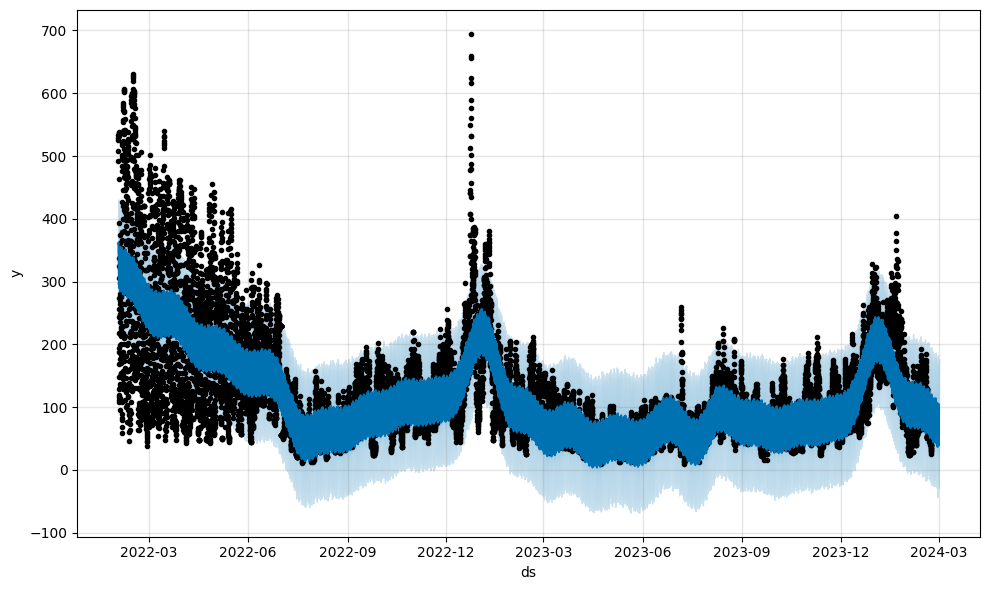

In [12]:
fig1 = m.plot(forecast)

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Se

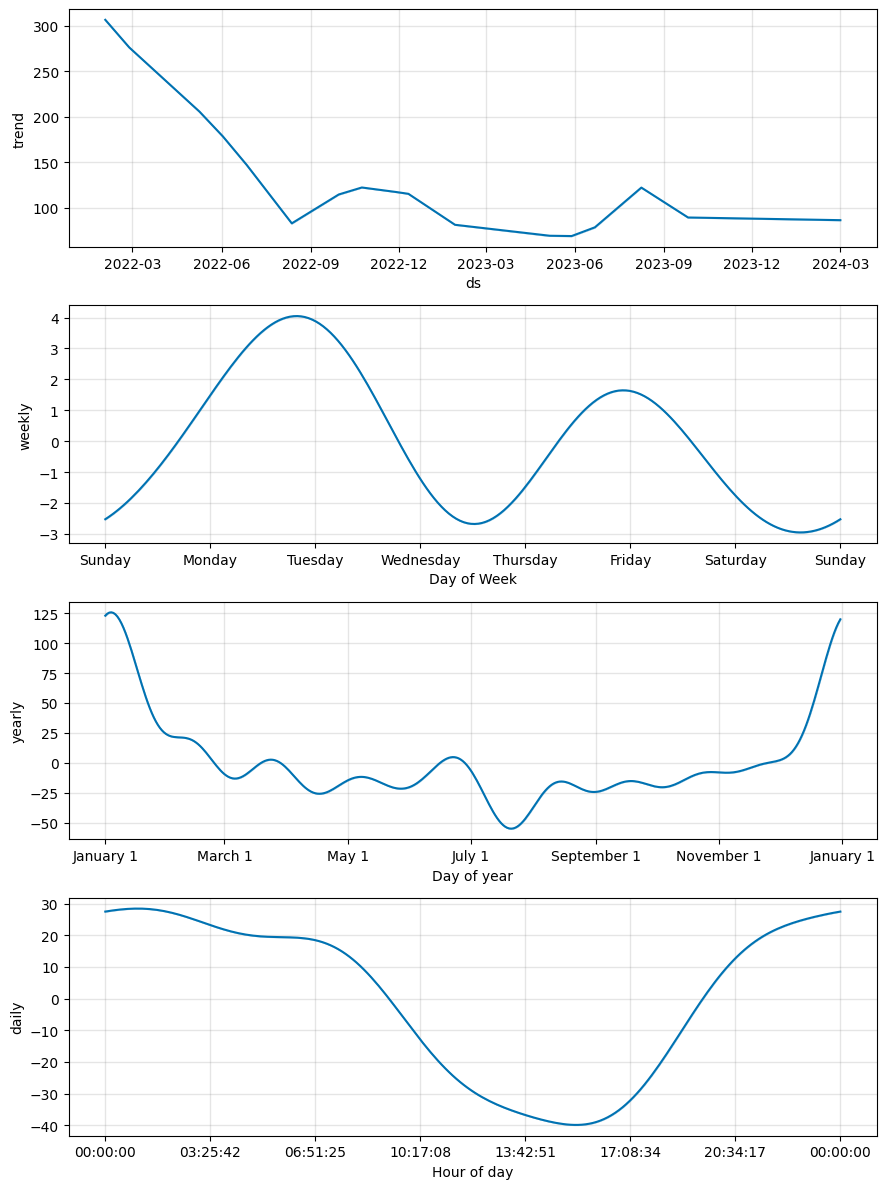

In [13]:
fig2 = m.plot_components(forecast)

In [14]:
predicted = forecast[-168:]

In [15]:
((y['y']-predicted['yhat'])**2).mean()**0.5

31.991076264446285

## Non Stationary

In [16]:
m = Prophet(interval_width=0.95)
m.fit(X)

23:17:09 - cmdstanpy - INFO - Chain [1] start processing
23:17:17 - cmdstanpy - INFO - Chain [1] done processing


In [17]:
future = m.make_future_dataframe(periods=7*24, freq='H')
future.tail()

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
18211,2024-02-29 19:00:00
18212,2024-02-29 20:00:00
18213,2024-02-29 21:00:00
18214,2024-02-29 22:00:00
18215,2024-02-29 23:00:00


In [18]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18211,2024-02-29 19:00:00,71.103852,-30.526066,169.643010
18212,2024-02-29 20:00:00,84.963243,-21.700152,192.258500
18213,2024-02-29 21:00:00,94.972921,-11.881785,199.120954
18214,2024-02-29 22:00:00,100.732890,-9.273428,204.862518
18215,2024-02-29 23:00:00,103.848111,-7.109884,206.338393


<Axes: xlabel='ds'>

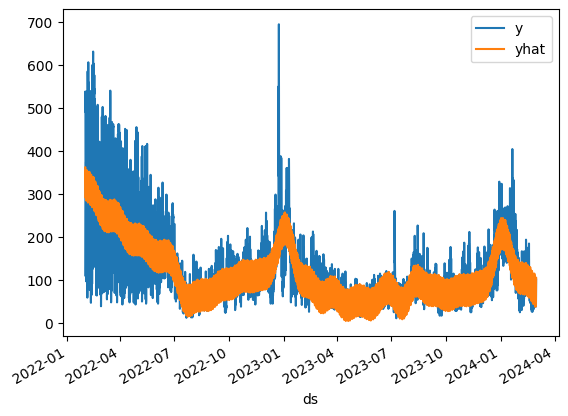

In [19]:
pd.concat([data.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

In [20]:
((y['y']-predicted['yhat'])**2).mean()**0.5

31.991076264446285

## Multiplicative

In [21]:
m = Prophet(interval_width=0.95, seasonality_mode='multiplicative')
m.fit(X)

23:17:27 - cmdstanpy - INFO - Chain [1] start processing
23:17:36 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
future = m.make_future_dataframe(periods=7*24, freq='H')
future.tail()

C:\Users\Hassan\AppData\Local\Programs\Python\Python311\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
18211,2024-02-29 19:00:00
18212,2024-02-29 20:00:00
18213,2024-02-29 21:00:00
18214,2024-02-29 22:00:00
18215,2024-02-29 23:00:00


In [23]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
18211,2024-02-29 19:00:00,68.297232,-24.796648,152.840607
18212,2024-02-29 20:00:00,85.109520,-1.623580,174.115259
18213,2024-02-29 21:00:00,97.469988,12.298512,192.604784
18214,2024-02-29 22:00:00,105.463168,18.437661,194.246759
18215,2024-02-29 23:00:00,111.520116,24.000418,197.841019


<Axes: xlabel='ds'>

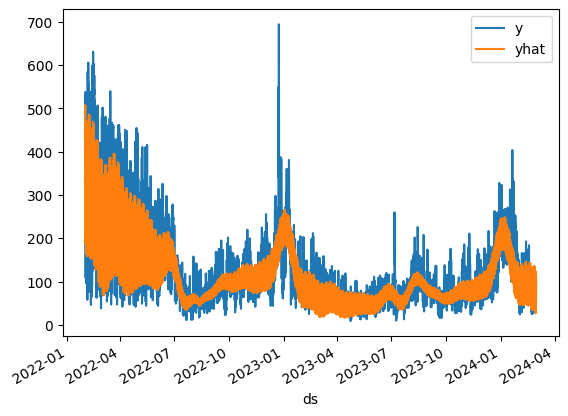

In [24]:
pd.concat([data.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).plot()

In [25]:
((data['y']-forecast['yhat'])**2).mean()**0.5

45.47527792187823